# 3. CIFAR10 딥러닝 모델
- CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류
- 32x32 픽셀의 6,000개 컬러 이미지
- 각 이미지는 10개의 클래스로 라벨링
- 머신러닝 연구에 가장 널리 사용되고있다

## 데이터 로드

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, 
                                                   test_size=0.20, random_state=42, shuffle=True)
# 훈련, 검증, 테스트 데이터와 레이 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [4]:
# cifar10 레이블 종류 변수화
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

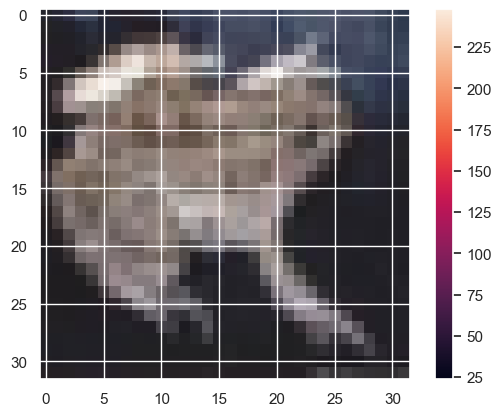

In [5]:
# 데이터 샘플 시각화
import seaborn as sns

sns.set_theme(style='darkgrid', palette='pastel')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [6]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


## 데이터 전처리
### Reshape
- 32 * 32 * 3 = 3072
  

In [7]:
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


### Normalization

In [8]:
# 이미지 값 정규화 : 0~1 사이 값 갖도록 변환
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

x_train[0]

array([0.13333333, 0.14117647, 0.16862745, ..., 0.22745098, 0.21960784,
       0.22745098])

## 모델 구성
### model1

In [10]:
# model1
'''
dropout: 50%
he_uniform initializer
batch normalization
Adam - learning rate : 0.001
'''
model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(512, kernel_initializer='he_uniform',
                      kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               1573376   
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_5 (Bat  (None, 512)               2048      
 chNormalization)                                     

## 모델 컴파일, 학습

In [11]:
# compile
from keras import optimizers
from keras import callbacks

adam = optimizers.legacy.Adam(learning_rate = 0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# ModelCheckpoint
check_point_cb = callbacks.ModelCheckpoint('project_cifar10_model.keras', save_best_only=True)

# EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# train
history = model.fit(x_train, y_train, epochs=100, batch_size=512,
                    validation_data=(x_val, y_val), callbacks=[check_point_cb, early_stop])

Epoch 1/100
79/79 [==============================] - 5s 51ms/step - loss: 6.7016 - accuracy: 0.1779 - val_loss: 2.7577 - val_accuracy: 0.2407
Epoch 2/100
79/79 [==============================] - 2s 31ms/step - loss: 2.3949 - accuracy: 0.2462 - val_loss: 2.2265 - val_accuracy: 0.2139
Epoch 3/100
79/79 [==============================] - 2s 30ms/step - loss: 2.1405 - accuracy: 0.2826 - val_loss: 2.2819 - val_accuracy: 0.2234
Epoch 4/100
79/79 [==============================] - 2s 27ms/step - loss: 2.0902 - accuracy: 0.2979 - val_loss: 2.1311 - val_accuracy: 0.2636
Epoch 5/100
79/79 [==============================] - 2s 27ms/step - loss: 2.0538 - accuracy: 0.3172 - val_loss: 2.1075 - val_accuracy: 0.2671
Epoch 6/100
79/79 [==============================] - 2s 25ms/step - loss: 2.0302 - accuracy: 0.3295 - val_loss: 2.3492 - val_accuracy: 0.1944
Epoch 7/100
79/79 [==============================] - 2s 22ms/step - loss: 2.0241 - accuracy: 0.3310 - val_loss: 2.1703 - val_accuracy: 0.2645
Epoch 

- 정확도가 36%에서 멈춘다.

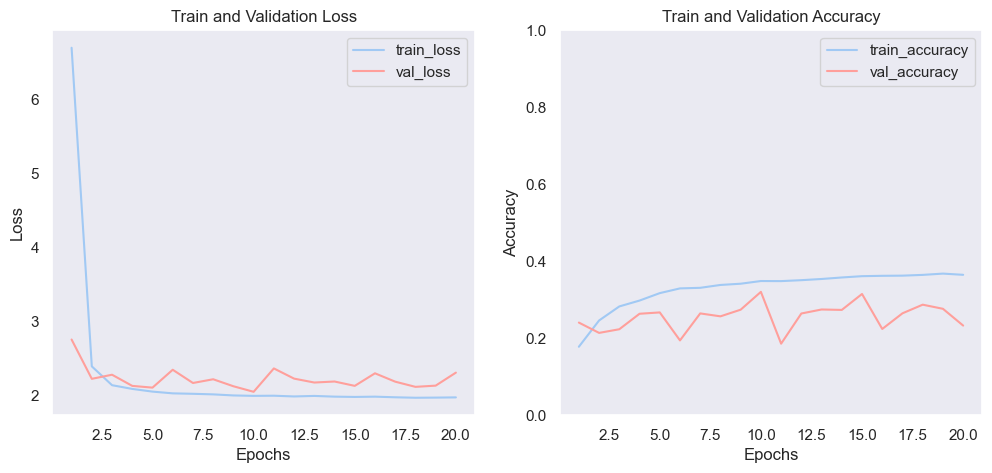

In [12]:
# history 1개 보여주는 그래프
def show_history(history):
    history_dict = history.history
    
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
    
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')

    ax2.set_ylim(0, 1)
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()
    
    plt.show()

show_history(history)

### model2
- model1의 규제를 완화

In [13]:
# model2
'''
he_uniform initializer
batch normalization
'''
model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(512, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(512, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization_8 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 512)              

In [14]:
# learning rate : 0.002
adam = optimizers.legacy.Adam(learning_rate = 0.002)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


# train
history2 = model.fit(x_train, y_train, epochs=100, batch_size=512,
                    validation_data=(x_val, y_val), callbacks=[check_point_cb, early_stop])

Epoch 1/100
79/79 [==============================] - 3s 34ms/step - loss: 1.9490 - accuracy: 0.3237 - val_loss: 2.3934 - val_accuracy: 0.2583
Epoch 2/100
79/79 [==============================] - 2s 23ms/step - loss: 1.5939 - accuracy: 0.4295 - val_loss: 2.2661 - val_accuracy: 0.2772
Epoch 3/100
79/79 [==============================] - 2s 26ms/step - loss: 1.4590 - accuracy: 0.4828 - val_loss: 1.8334 - val_accuracy: 0.3336
Epoch 4/100
79/79 [==============================] - 2s 24ms/step - loss: 1.3685 - accuracy: 0.5158 - val_loss: 1.8972 - val_accuracy: 0.3351
Epoch 5/100
79/79 [==============================] - 2s 24ms/step - loss: 1.2869 - accuracy: 0.5455 - val_loss: 2.1498 - val_accuracy: 0.2487
Epoch 6/100
79/79 [==============================] - 2s 22ms/step - loss: 1.2235 - accuracy: 0.5656 - val_loss: 1.7470 - val_accuracy: 0.3866
Epoch 7/100
79/79 [==============================] - 2s 25ms/step - loss: 1.1571 - accuracy: 0.5916 - val_loss: 1.8606 - val_accuracy: 0.3505
Epoch 

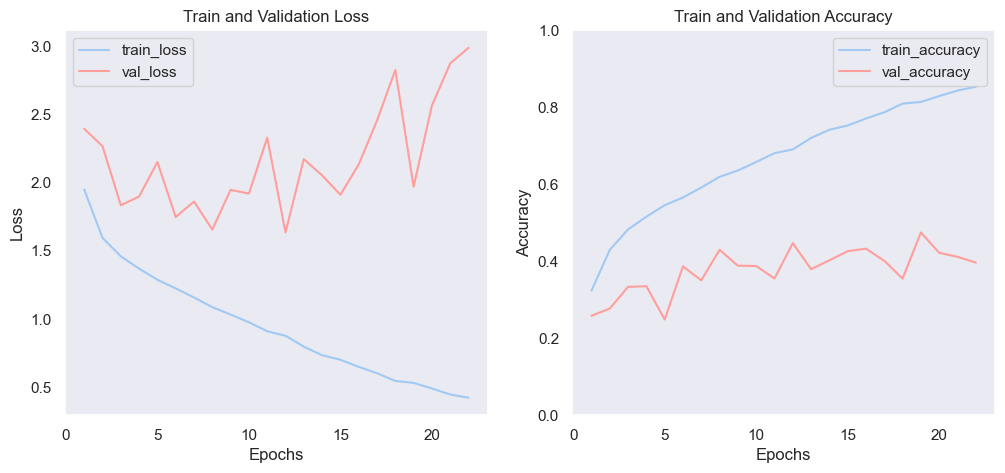

In [15]:
show_history(history2)

- 규제를 줄였더니 훈련 정확도는 높아졌지만 과대적합이 강해졌다
- 노드에서도 CNN계열의 모델을 사용해야한다고 하니 CNN을 사용해봐야겠다.

### model3 - CNN

In [23]:
# CNN용 데이터셋 준비
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, 
                                                   test_size=0.20, random_state=42, shuffle=True)

# 이미지 값 정규화 : 0~1 사이 값 갖도록 변환
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [32]:
def cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',
                            input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(layers.Flatten())
    # dense layer with 512 neurons
    model.add(layers.Dense(512, activation='relu'))
    # final layer with 3 neurons to classify the instances
    model.add(layers.Dense(10, activation='softmax'))

    adam = optimizers.legacy.Adam(learning_rate = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [33]:
cnn = cnn()
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_15 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 activation_16 (Activation)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [34]:
# train
history3 = cnn.fit(x_train, y_train, epochs=100, batch_size=512,
                    validation_data=(x_val, y_val), callbacks=[check_point_cb, early_stop])

Epoch 1/100
79/79 [==============================] - 19s 240ms/step - loss: 1.8219 - accuracy: 0.3399 - val_loss: 1.6388 - val_accuracy: 0.4162
Epoch 2/100
79/79 [==============================] - 17s 212ms/step - loss: 1.4753 - accuracy: 0.4678 - val_loss: 1.3974 - val_accuracy: 0.4993
Epoch 3/100
79/79 [==============================] - 17s 211ms/step - loss: 1.3250 - accuracy: 0.5239 - val_loss: 1.3248 - val_accuracy: 0.5294
Epoch 4/100
79/79 [==============================] - 19s 240ms/step - loss: 1.2068 - accuracy: 0.5695 - val_loss: 1.1642 - val_accuracy: 0.5864
Epoch 5/100
79/79 [==============================] - 17s 210ms/step - loss: 1.1247 - accuracy: 0.6032 - val_loss: 1.3276 - val_accuracy: 0.5472
Epoch 6/100
79/79 [==============================] - 17s 211ms/step - loss: 1.0713 - accuracy: 0.6215 - val_loss: 1.0596 - val_accuracy: 0.6299
Epoch 7/100
79/79 [==============================] - 17s 217ms/step - loss: 0.9964 - accuracy: 0.6503 - val_loss: 1.0946 - val_accuracy:

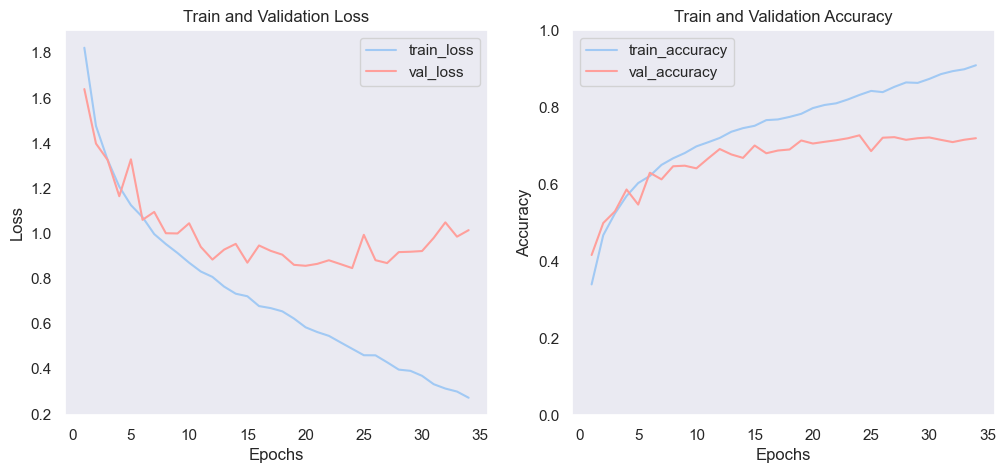

In [35]:
show_history(history3)

- 과적합이 의심된다
- 규제를 더해서 마지막 모델로 한번더 훈련해본다

### model4 - cnn2

In [48]:
def cnn2():
    model = models.Sequential()
    
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer='he_normal',
                           input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(layers.Flatten())
    # dense layer with 512 neurons
    model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
    # final layer with 10 neurons to classify the instances
    model.add(layers.Dense(10, activation='softmax'))
    
    adam = optimizers.legacy.Adam(learning_rate = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [49]:
cnn2 = cnn2()
cnn2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_20 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)      

In [50]:
# train
history4 = cnn2.fit(x_train, y_train, epochs=100, batch_size=512,
                    validation_data=(x_val, y_val), callbacks=[check_point_cb, early_stop])

Epoch 1/100
79/79 [==============================] - 27s 338ms/step - loss: 2.2142 - accuracy: 0.2470 - val_loss: 2.1768 - val_accuracy: 0.2252
Epoch 2/100
79/79 [==============================] - 26s 332ms/step - loss: 1.7498 - accuracy: 0.3624 - val_loss: 2.2988 - val_accuracy: 0.2327
Epoch 3/100
79/79 [==============================] - 25s 319ms/step - loss: 1.6210 - accuracy: 0.4058 - val_loss: 2.0471 - val_accuracy: 0.2755
Epoch 4/100
79/79 [==============================] - 25s 315ms/step - loss: 1.5338 - accuracy: 0.4364 - val_loss: 1.7834 - val_accuracy: 0.3603
Epoch 5/100
79/79 [==============================] - 26s 325ms/step - loss: 1.4753 - accuracy: 0.4593 - val_loss: 1.6566 - val_accuracy: 0.4279
Epoch 6/100
79/79 [==============================] - 26s 325ms/step - loss: 1.4283 - accuracy: 0.4787 - val_loss: 1.4659 - val_accuracy: 0.4689
Epoch 7/100
79/79 [==============================] - 26s 328ms/step - loss: 1.3919 - accuracy: 0.4914 - val_loss: 1.3557 - val_accuracy:

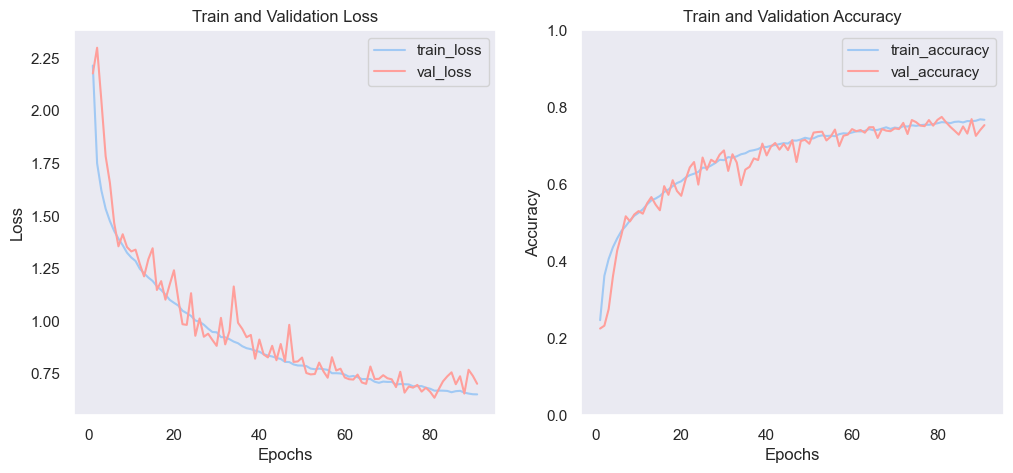

In [51]:
show_history(history4)

- 학습속도가 매우 느리다.. 하지만 과대적합은 확실히 잡았다.
- 이 정도에서 테스트셋 확인을 해보자

In [58]:
test_loss, test_accuracy = cnn2.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.6438 - accuracy: 0.7792 - 2s/epoch - 5ms/step
test_loss: 0.6438255906105042 
test_accuracy: 0.77920001745224


- 학습이 더 되었다면 최종 정확도도 그에 맞춰서 높게 나왓을것 같다.
- 승순님이 했던 작업중에 `하이퍼파라미터 튜닝을 통한 최적화(Baysian Optimization`을 시도해보려고했는데, 내용이 정말 어렵다..!
- 일단 여기에서 마무리하고 조금 더 deep CNN 모델에 대해 공부해봐야겠다.


---
# 🧐 Project_Deeplearning 최종 회고

[KEEP]   
- 즐겁게 몰입하며 프로젝트를 진행했다. 필요한 내용을 찾고, 에러를 수정하는 과정이 전보다 훨씬 수월해져서 이런 저런, 새로운 오류들이 많았지만 큰 어려움 없이 진행했다.
- 앞선 과정에서 배운 기능을 최대한 모두 활용해보려고 노력했다.
- 자주 쓰는 기능(데이터 시각화, 두 데이터 비교 그래프 등)함수화해서 쓰는게 확실히 좋다는걸 느꼈다.
- seaborn 을 이용해서 그래프를 조금 예쁘게 만들어보려고 했다.
  
[PROBLEM]   
- 드디어 딥러닝의 세계에 들어온것같다. 학습시간이 굉장히 길어졌다. 전에는 일단 실행하고 오류가 나오면 수정하는방식이었다면, 이제는 코드셀을 실행하기전에 최대한 내용을 검수하고 실행해야했다. 그럼에도 shape, 오타 등의 문제로 여러번 재실행해야하는 상황이 생겼고 이 부분에서 시간이 더 지연되었다.
- 이전에 써두었던 코드를 그대로 가져와서 쓰면서 지금 상황에 맞게 수정해야하는 부분을 꼼꼼하게 확인하지 못하는 부분이 많아졌다. 
- 어떤 모델을 만들어야겠다는 정리를 하지않고 무작정 문제를 풀어가는 태도로 모델을 만들었더니 방금 전 모델은 뭘한건지 스스로 정리가 되지 않았다.
- seaborn으로 그래프를 그릴때 plt로 시각화하는것도 있고, sns로 시각화하는것도 있는데 아직 정리가 잘되지않는다.

[TRY]   
- 재사용 가능하도록 함수화하는 습관을 가져본다. 특히 모델이나 그래프 시각화 하는 코드는 어떤 데이터셋에도 사용가능하도록 변수를 잘 지정해보자
- 코드를 꼼꼼하게 써보자. 사소한 스펠링으로 모델학습을 다시 해야 하는 경우의 수를 줄이자.
- 데이터셋에 대해 좀 더 이해하는 시간을 갖고, 모델을 만들때 이번 모델의 목적은 뭔지 미리 정리를 하고 만들어보자.
- seaborn 시각화를 공부해보자. 